In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("dark")
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import folium

In [2]:
df=pd.read_csv("crime_clean.csv")
df['OCCURRED_ON_DATE']=pd.to_datetime(df['OCCURRED_ON_DATE'])
df.head()

OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION DISTRICT  \
0           619               Larceny    LARCENY ALL OTHERS      D14   
1          1402             Vandalism             VANDALISM      C11   
2          3410                 Towed   TOWED MOTOR VEHICLE       D4   
3          3114  Investigate Property  INVESTIGATE PROPERTY       D4   
4          3114  Investigate Property  INVESTIGATE PROPERTY       B3   

  REPORTING_AREA    OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0            808 2018-09-02 13:00:00  2018      9      Sunday    13   
1            347 2018-08-21 00:00:00  2018      8     Tuesday     0   
2            151 2018-09-03 19:27:00  2018      9      Monday    19   
3            272 2018-09-03 21:16:00  2018      9      Monday    21   
4            421 2018-09-03 21:05:00  2018      9      Monday    21   

     UCR_PART        Lat       Long          OFFENSE_TYPE DISTRCIT NAME  
0    Part One  42.377875 -71.156442    LARCENY ALL OTHERS      Brighton  
1    Part Two  42.377875 -71.074495             VANDALISM    Dorchester  
2  Part Three  42.377875 -71.077230   TOWED MOTOR VEHICLE     South End  
3  Part Three  42.377875 -71.077230  INVESTIGATE PROPERTY     South End  
4  Part Three  42.377875 -71.092427  INVESTIGATE PROPERTY      Mattapan

In [3]:
len(df['OFFENSE_TYPE'].unique())

218

In [4]:
df_type=pd.DataFrame(df.groupby(['DISTRCIT NAME','OFFENSE_TYPE']).size().to_frame('count').sort_values(by='count',ascending=False))
df_type.reset_index(inplace=True)
df_type.head(7)

DISTRCIT NAME                           OFFENSE_TYPE  count
0     South End                    LARCENY SHOPLIFTING   3219
1       Roxbury                         VERBAL DISPUTE   3008
2      Mattapan                         VERBAL DISPUTE   2957
3       Roxbury  M/V - LEAVING SCENE - PROPERTY DAMAGE   2757
4       Roxbury                     INVESTIGATE PERSON   2747
5    Dorchester  M/V - LEAVING SCENE - PROPERTY DAMAGE   2713
6       Roxbury          SICK/INJURED/MEDICAL - PERSON   2684

In [5]:
lat_dict = {'Brighton': 42.3778749,
 'Dorchester': 42.3778749,
 'South End': 42.3778749,
 'Mattapan': 42.3778749,
 'Roxbury': 42.3778749,
 'South Boston': 42.3778749,
 'Downtown': 42.3778749,
 'West Roxbury': 42.3778749,
 'East Boston': 42.3778749,
 'Jamaica Plain': 42.3778749,
 'Hyde Park': 42.3778749,
 'Charlestown': 42.3778749}

In [6]:
lng_dict = {'Brighton': -71.1564423,
 'Dorchester': -71.0744952,
 'South End': -71.0772298,
 'Mattapan': -71.0924273,
 'Roxbury': -71.0950158,
 'South Boston': -71.0494949,
 'Downtown': -71.0598094,
 'West Roxbury': -71.1494972,
 'East Boston': -71.0392173,
 'Jamaica Plain': -71.1203299,
 'Hyde Park': -71.1244963,
 'Charlestown': -71.0619957}

In [7]:
df_type['Lat']=df_type['DISTRCIT NAME'].map(lat_dict)
df_type['Lng']=df_type['DISTRCIT NAME'].map(lng_dict)

In [8]:
df_type.head()

DISTRCIT NAME                           OFFENSE_TYPE  count        Lat  \
0     South End                    LARCENY SHOPLIFTING   3219  42.377875   
1       Roxbury                         VERBAL DISPUTE   3008  42.377875   
2      Mattapan                         VERBAL DISPUTE   2957  42.377875   
3       Roxbury  M/V - LEAVING SCENE - PROPERTY DAMAGE   2757  42.377875   
4       Roxbury                     INVESTIGATE PERSON   2747  42.377875   

         Lng  
0 -71.077230  
1 -71.095016  
2 -71.092427  
3 -71.095016  
4 -71.095016

In [9]:
from folium import plugins

#  map of Boston
bos_loc=(42.361,-71.057)
bos_map = folium.Map(location =bos_loc, zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(bos_map)


for lat, lng, label, in zip(df_type.Lat, df_type.Lng, df_type.OFFENSE_TYPE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

bos_map

In [10]:
lat_=df['Long'].value_counts()

In [11]:
len(df_type)

2057

**Visualize the count of criminal in each district**

In [12]:
df_dis_plot=pd.DataFrame(df['DISTRCIT NAME'].value_counts()).reset_index().rename(columns={"index":"District","DISTRCIT NAME":"Count"})
df_dis_plot

District  Count
0         Roxbury  49929
1      Dorchester  42515
2       South End  41908
3        Downtown  35715
4        Mattapan  35429
5    South Boston  23454
6        Brighton  20118
7   Jamaica Plain  17532
8       Hyde Park  17340
9     East Boston  13541
10   West Roxbury  13232
11    Charlestown   6505

In [15]:
fig = px.bar(df_dis_plot, x='District', y='Count',
             hover_data=['District', 'Count'], color='Count',
             labels={'Count':'Number of Criminal Records'},
             title='Count of Criminal Records in Each District',
             height=400)
fig.show()

**Roxbury ranked no.1 in terms of frequency of criminal incidences in last 5 years. Next visulize different periods among a day to see the distribution, regardless of districts**

In [16]:
df_hour=pd.DataFrame(df['HOUR'].value_counts()).reset_index().rename(columns={"index":"Hour of Day","HOUR":"Count"})
df_hour.head()

Hour of Day  Count
0           17  20635
1           18  20170
2           16  19762
3           12  18570
4           19  17499

Bin the data, split it into three different categories: **Morning, Afternoon, Evening, Night**

In [17]:
bins = np.linspace(df_hour['Hour of Day'].min(), df_hour['Hour of Day'].max(),5)
group_names=['Night','Morning','Afternoon','Evening']

In [18]:
df_hour['Period']=pd.cut(df_hour['Hour of Day'],bins,labels=group_names,include_lowest=True)
df_hour.head()

Hour of Day  Count     Period
0           17  20635  Afternoon
1           18  20170    Evening
2           16  19762  Afternoon
3           12  18570  Afternoon
4           19  17499    Evening

In [19]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
data=[go.Pie(labels=df_hour['Period'], values=df_hour['Count'])]
layout=go.Layout(title='Distribution of Criminal Records according to 4 Periods of a Day')
fig = go.Figure(data,layout)
                      
fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

**Use linear plot from seaborn to see if there is a connection between hour and count**

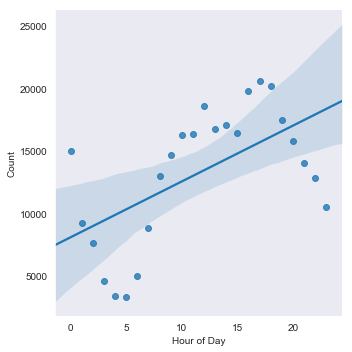

In [20]:
sns.lmplot(x='Hour of Day',y='Count',data=df_hour);

**Use Joinplot from seaborn to see the connection between hour and count**

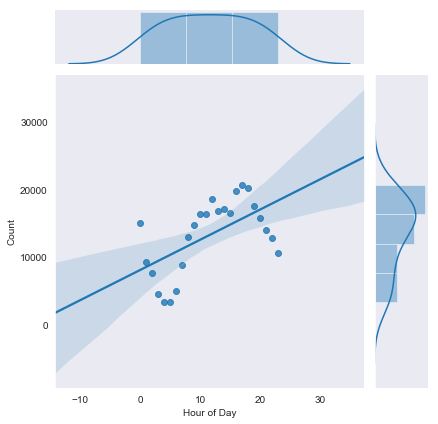

In [21]:
sns.jointplot(x='Hour of Day',y='Count',data=df_hour,kind="reg");

**Same for  a specific day of a week**

In [22]:
df_dayofweek=pd.DataFrame(df['DAY_OF_WEEK'].value_counts()).reset_index().rename(columns={"index":"Day of Week","DAY_OF_WEEK":"Count"})
df_dayofweek

Day of Week  Count
0      Friday  48186
1   Wednesday  46498
2    Thursday  46373
3     Tuesday  46106
4      Monday  45404
5    Saturday  44572
6      Sunday  40079

In [23]:
data=go.Scatter(x=df_dayofweek['Day of Week'],y=df_dayofweek['Count'],mode='lines+markers')
layout=go.Layout(title='Number of Criminal Records on a Specific Day of Week')
fig=go.Figure(data,layout)
fig.show()

**Find out th most frequently happened Incidence in each district**

In [24]:
df_c=pd.crosstab(index=df['DISTRCIT NAME'],columns=df['OFFENSE_TYPE'])
df_c.head()

OFFENSE_TYPE   A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.  \
DISTRCIT NAME                                                 
Brighton                                                  0   
Charlestown                                               0   
Dorchester                                                0   
Downtown                                                  0   
East Boston                                               0   

OFFENSE_TYPE   A&B ON POLICE OFFICER  ABDUCTION - INTICING  AFFRAY  \
DISTRCIT NAME                                                        
Brighton                           0                     0      11   
Charlestown                        0                     0       2   
Dorchester                         1                     0      14   
Downtown                           1                     0      52   
East Boston                        0                     0      13   

OFFENSE_TYPE   AIRCRAFT INCIDENTS  ANIMAL ABUSE  \
DISTRCIT NAME                                     
Brighton                        0             6   
Charlestown                     0             3   
Dorchester                      0             6   
Downtown                        0             7   
East Boston                    33             5   

OFFENSE_TYPE   ANIMAL CONTROL - DOG BITES - ETC.  ANIMAL INCIDENTS  \
DISTRCIT NAME                                                        
Brighton                                      37                21   
Charlestown                                   12                11   
Dorchester                                    52                43   
Downtown                                      18                18   
East Boston                                   27                23   

OFFENSE_TYPE   ANNOYING AND ACCOSTING  ARSON  ...  \
DISTRCIT NAME                                 ...   
Brighton                            6      6  ...   
Charlestown                         7      5  ...   
Dorchester                         13      7  ...   
Downtown                           24      8  ...   
East Boston                         8      5  ...   

OFFENSE_TYPE   VIOL. OF RESTRAINING ORDER W NO ARREST  \
DISTRCIT NAME                                           
Brighton                                           66   
Charlestown                                        27   
Dorchester                                        276   
Downtown                                           86   
East Boston                                        48   

OFFENSE_TYPE   VIOLATION - CITY ORDINANCE  \
DISTRCIT NAME                               
Brighton                                3   
Charlestown                             3   
Dorchester                             27   
Downtown                               99   
East Boston                            16   

OFFENSE_TYPE   VIOLATION - CITY ORDINANCE CONSTRUCTION PERMIT  \
DISTRCIT NAME                                                   
Brighton                                                    3   
Charlestown                                                 2   
Dorchester                                                  5   
Downtown                                                   12   
East Boston                                                 8   

OFFENSE_TYPE   VIOLATION - HAWKER AND PEDDLER  WARRANT ARREST  \
DISTRCIT NAME                                                   
Brighton                                    0             250   
Charlestown                                 0             116   
Dorchester                                  1            1195   
Downtown                                    5            1690   
East Boston                                 1             349   

OFFENSE_TYPE   WEAPON - FIREARM - CARRYING / POSSESSING, ETC  \
DISTRCIT NAME                                                  
Brighton                                                  12   
Charlestown               

In [25]:
len(df['DISTRCIT NAME'].unique())

12

Create first dataframe to give the number of most-frequently happened incidence in each district

In [26]:
s1=pd.DataFrame(df_c.max(axis=1),columns=['Count'])
s1

Count
DISTRCIT NAME       
Brighton        1487
Charlestown      464
Dorchester      2713
Downtown        2148
East Boston     1040
Hyde Park       1349
Jamaica Plain   1127
Mattapan        2957
Roxbury         3008
South Boston    1508
South End       3219
West Roxbury    1187

Create second dataframe to give names of each Incidence

In [27]:
s2=pd.DataFrame(df_c.idxmax(axis=1),columns=['Incidence'])
s2

Incidence
DISTRCIT NAME                                       
Brighton                         TOWED MOTOR VEHICLE
Charlestown                       INVESTIGATE PERSON
Dorchester     M/V - LEAVING SCENE - PROPERTY DAMAGE
Downtown                    ASSAULT SIMPLE - BATTERY
East Boston            SICK/INJURED/MEDICAL - PERSON
Hyde Park              SICK/INJURED/MEDICAL - PERSON
Jamaica Plain          SICK/INJURED/MEDICAL - PERSON
Mattapan                              VERBAL DISPUTE
Roxbury                               VERBAL DISPUTE
South Boston           SICK/INJURED/MEDICAL - PERSON
South End                        LARCENY SHOPLIFTING
West Roxbury           SICK/INJURED/MEDICAL - PERSON

Concat two dataframes together

In [28]:
df_dis_in=pd.concat([s2,s1],axis=1).sort_values(by='Count',ascending=False)
df_dis_in

Incidence  Count
DISTRCIT NAME                                              
South End                        LARCENY SHOPLIFTING   3219
Roxbury                               VERBAL DISPUTE   3008
Mattapan                              VERBAL DISPUTE   2957
Dorchester     M/V - LEAVING SCENE - PROPERTY DAMAGE   2713
Downtown                    ASSAULT SIMPLE - BATTERY   2148
South Boston           SICK/INJURED/MEDICAL - PERSON   1508
Brighton                         TOWED MOTOR VEHICLE   1487
Hyde Park              SICK/INJURED/MEDICAL - PERSON   1349
West Roxbury           SICK/INJURED/MEDICAL - PERSON   1187
Jamaica Plain          SICK/INJURED/MEDICAL - PERSON   1127
East Boston            SICK/INJURED/MEDICAL - PERSON   1040
Charlestown                       INVESTIGATE PERSON    464

Use bubble plot to visualize the result

In [29]:
data=go.Scatter(
    x=df_dis_in.index,
    y=df_dis_in['Incidence'],
    mode='markers',
    hovertext=df_dis_in['Count'],
    marker=dict(
        size=25,
        color=df_dis_in['Count'],     
        showscale=True,
        reversescale=True
    )
)

layout=go.Layout(title='Most frequently happened Incidence per District')

fig=go.Figure(data,layout)

fig.show()